# Анализ данных игровой индустрии

Заказчиком проекта является интернет-магазин, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Необходимо выявить определяющие успешность игры закономерности — это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

---

**Цель исследования:** проанализировать данные и выявить закономерности, определяющие успешность игры, чтобы помочь бизнесу сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

---

**План выполнения работы:**

- загрузка и предварительное изучение данных
- исследовательский анализ данных
- проверка гипотез о пользовательских рейтингах
    
Каждый шаг исследования заканчивается промежуточным выводом. В конце исследования даётся общий подробный вывод

---

- в распоряжении имеются данные до 2016 года; по условию задачи на момент выполнения проекта за окном декабрь 2016 года, кампания планируется на 2017 год
- данные за 2016 год могут быть неполными
- в наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр

---

In [1]:
# установка широкоформатного jupyter

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [160]:
# импорт библиотек

import os
import re
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
# константы

PATH = 'D:\\datasets\\games.csv'
NAME = 'games'

---

In [4]:
def load_dataset(PATH):
    
    """
    Функция load_dataset загружает csv-файл, путь к которому хранится в переменной PATH
    
    Аргументы:
    PATH (str) : путь к файлу
    
    Возвращает:
    data (DataFrame) : загруженный датафрейм
    
    """

    try:
        data = pd.read_csv(PATH, sep=',')
        filename = os.path.basename(PATH)
        print(f'Файл {filename} успешно загружен!')
    except Exception as error:
        print(f'Упс, что-то пошло не так при загрузке файла {os.path.basename(PATH)}! Текст ошибки: {repr(error)}')

    return data

In [5]:
def get_info(data):
    
    """
    Функция get_info выводит на экран пять случайных строк таблицы и общую информацию, полученную с помощью info()

    Аргументы:
    data (DataFrame): датафрейм

    """
    
    print('Пять случайных строк таблицы:')
    display(data.sample(5))
    print(' ')
    print('Общая информация о таблице:')
    print(' ')
    print(data.info())

In [6]:
def preprocess(data, data_name):
    
    """
    Функция preprocess выводит на экран количество дубликатов и пропусков в датафрейме

    Аргументы:
    data (DataFrame) : датафрейм
    data_name (str) : название датафрейма
    
    """
    
    for col in data:
        isna_count = data[col].isna().sum()
        if isna_count > 0:
            print(f'Пропусков найдено в столбце {col}: {isna_count}')
    isna_total = data.isna().sum().sum()
    if isna_total == 0:
        print(f'В таблице {data_name} не найдено ни одного пропуска!')
        
    duplicates_count = data.duplicated().sum()
    if duplicates_count > 0:
        print(f'Дубликатов найдено: {duplicates_count}')
    else:
        print(f'В таблице {data_name} не найдено ни одного дубликата!')

In [7]:
def cols_list(data, data_name):
    
    """
    Функция cols_list выводит на экран список столбцов датафрейма
    
    Аргументы:
    data (DataFrame) : датафрейм
    data_name (str) : название датафрейма
    
    """

    print(f'Cписок столбцов в таблице {data_name}:\n\n', data.columns.to_list())

In [8]:
def isna_share(data, data_name):
    
    """
    Функция isna_share подсчитывает и выводит на экран долю пропущенных значений 
    
    Аргументы:
    data (DataFrame) : датафрейм
    data_name (str) : название таблицы
    
    """
    
    print(f'Доля пропущенных значений в файле {data_name}:')
    print(' ')
    print(data.apply(lambda x: f"{100 - (x.count() / len(x)) * 100:.2f}%"))

In [9]:
def hidden_duplicates(data):
        
    """
    Функция hidden_duplicates сохраняет все столбцы типа object и/или category в переменную columns, 
    выводит на экран уникальные значения в каждом из этих столбцов 

    Аргументы:
    data (DataFrame): датафрейм
    
    """
    
    columns = data.select_dtypes(include=['object', 'category']).columns
    
    for column in columns:
        unique_values = data[column].unique()
        print(f'Уникальные значения в столбце {column}: {unique_values}')
        print(' ')

In [10]:
def describe(data, col, data_name):
                    
    """
    Функция describe выводит на экран числовое описание данных в количественном столбце

    Аргументы:
    data (DataFrame) : датафрейм
    col (str) : столбец датафрейма
    data_name (str) : название датафрейма
    
    """
    
    print(f'Числовое описание столбца {col} таблицы {data_name}:')
    print(' ')
    print(data[col].describe())

In [11]:
def value_counts(data, col, data_name):
                
    """
    Функция value_counts выводит на экран числовое распределение данных в категориальном столбце

    Аргументы:
    data (DataFrame) : датафрейм
    col (str) : столбец датафрейма
    data_name (str) : название датафрейма
    
    """
    
    print(f'Распределение данных в столбце {col} таблицы {data_name}:')
    print(' ')
    print(data[col].value_counts())

---

<div style="background-color: rgba(255, 255, 255, 0.8); padding: 20px; font-size: 25px; color: rgba(28, 28, 28, 1);">
Загрузка и предварительное изучение данных
</div>

---

In [12]:
# применим функцию load_datasets()

games = load_dataset(PATH)

Файл games.csv успешно загружен!


In [13]:
# изучим общую информацию о таблице

get_info(games)

Пять случайных строк таблицы:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7021,NASCAR 08,PS3,2007.0,Racing,0.15,0.05,0.00,0.03,57.0,5,E
7808,Quantum Theory,PS3,2010.0,Shooter,0.05,0.09,0.02,0.03,43.0,5.3,M
16155,Kaitou Joker: Toki o Koeru Kaitou to Ushinawar...,3DS,2015.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
14744,Kaitou Tenshi Twin Angel: Toki to Sekai no Mei...,PSP,2011.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
11727,Vietcong: Purple Haze,XB,2004.0,Shooter,0.06,0.02,0.00,0.00,57.0,8.4,M


 
Общая информация о таблице:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


- в таблице 11 столбцов и 16715 строк
- названия столбцов необходимо привести к нижнему регистру
- в столбцах Year_of_Release и Critic_Score необходимо изменить тип данных с float на int
- обнаружены пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating
- после устранения пропусков в столбце User_Score тип данных object необходимо заменить на float

<div style="border: 1px solid rgba(0, 0, 0, 0.2); border-radius: 10px; background-color: rgba(255, 255, 255, 0.8); padding: 10px;">
Данные успешно загружены и соответствуют описанию. Типы данных и названия столбцов требуют преобразования, в нескольких столбцах обнаружены пропуски
<div>

---

<div style="background-color: rgba(255, 255, 255, 0.8); padding: 20px; font-size: 25px; color: rgba(28, 28, 28, 1);">
Предобработка данных
</div>

---

In [14]:
# приведём названия столбцов к нижнему регистру

games.columns = games.columns.str.lower()

In [15]:
# для удобства переименуем столбец year_of_release в release_year

games = games.rename(columns={'year_of_release':'release_year'})

In [16]:
# проверим результат

cols_list(games, 'games')

Cписок столбцов в таблице games:

 ['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


---

In [17]:
# проверим таблицу на наличие пропусков и дубликатов

preprocess(games, 'games')

Пропусков найдено в столбце name: 2
Пропусков найдено в столбце release_year: 269
Пропусков найдено в столбце genre: 2
Пропусков найдено в столбце critic_score: 8578
Пропусков найдено в столбце user_score: 6701
Пропусков найдено в столбце rating: 6766
В таблице games не найдено ни одного дубликата!


In [18]:
# выведем на экран долю пропущенных значений в каждом столбце

isna_share(games, 'games')

Доля пропущенных значений в файле games:
 
name             0.01%
platform         0.00%
release_year     1.61%
genre            0.01%
na_sales         0.00%
eu_sales         0.00%
jp_sales         0.00%
other_sales      0.00%
critic_score    51.32%
user_score      40.09%
rating          40.48%
dtype: object


Суммарная доля пропущенных значений в столбцах `name`, `release_year` и `genre` составляет менее 2% от общего количества данных, поэтому эти пропуски из таблицы можно удалить

In [19]:
# избавимся от пропусков в столбцах name, release_year и genre

games = games.dropna(subset=['name', 'release_year', 'genre']).reset_index(drop=True)

In [20]:
# проверим результат

isna_share(games, 'games')

Доля пропущенных значений в файле games:
 
name             0.00%
platform         0.00%
release_year     0.00%
genre            0.00%
na_sales         0.00%
eu_sales         0.00%
jp_sales         0.00%
other_sales      0.00%
critic_score    51.45%
user_score      40.17%
rating          40.60%
dtype: object


Пропущенные значения в столбце `rating` могут быть связаны с тем, что [рейтинг ESRB распространяется только на США, Канаду и Мексику](https://www.kingston.com/ru/blog/gaming/understanding-video-games-age-ratings-esrb-pegi#:~:text=%D0%A1%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D0%B0%20ESRB%20%2D%20%D0%A1%D0%A8%D0%90%2C%20%D0%9C%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0%20%D0%B8%20%D0%9A%D0%B0%D0%BD%D0%B0%D0%B4%D0%B0&text=%D0%9F%D0%BE%D0%B4%D1%85%D0%BE%D0%B4%D0%B8%D1%82%20%D0%B4%D0%BB%D1%8F%20%D0%B2%D1%81%D0%B5%D1%85%20%D0%B2%D0%BE%D0%B7%D1%80%D0%B0%D1%81%D1%82%D0%BD%D1%8B%D1%85%20%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B9,%D0%9D%D0%B5%20%D0%B4%D0%BE%D0%BB%D0%B6%D0%BD%D0%B0%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D1%8C%D1%81%D1%8F%20%D0%BD%D0%B5%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F%20%D0%BB%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0.). Предположим, что пропуски в этом столбце связаны не с ошибкой заполнения данных, а с тем, что некоторые игры были выпущены в какой-то другой стране. Заменим эти пропуски на нейтральное значение no_ESRB

In [21]:
# произведём замену пропусков в столбце rating

games['rating'] = games['rating'].fillna('no_ESRB')

In [22]:
# изменим тип данных в столбце release_year с вещественного на целочисленный

games['release_year'] = games['release_year'].astype('int')

В столбцах `user_score` и `critic_score` типы данных — вещественные, хотя в столбце `critic_score` значения явно должны быть целочисленными, так как не имеют символов после запятой. Гораздо удобнее, если оба этих столбца будут одного и того же типа данных, столбец `user_score` округлять будет ошибкой, и именно поэтому трогать их не нужно

In [23]:
# посмотрим, какие значения встречаются в столбце user_score

value_counts(games, 'user_score', 'games')

Распределение данных в столбце user_score таблицы games:
 
user_score
tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64


Видим неясное значение — tbd. [Поиск в Интернете](https://wildwolfs.ru/blog/kompjuternye-igry/tbd-chto-znachit-eto-sokrashhenie/) помог выяснить, что tbd — это аббревиатура, расшифровывающаяся как To Be Determined, то есть, Будет определено. Это может значить, что игры, отмеченные как tbd, вышли совсем недавно и ещё не набрали достаточное количество оценок пользователей. Проверим это, посмотрев на срез данных

In [24]:
# посмотрим на срез данных с помощью query

games.query('user_score == "tbd"')

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16426,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16427,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16433,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Предположение не подтвердилось. Видим, что дата выхода игр может быть совершенно любая. Значит, эти значения связаны с тем, что достаточного количества оценок просто не было набрано. Заменим их на пропуски для последующей обработки

In [25]:
# заменим на пропуски значения tbd в столбце user_score

games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [26]:
# приведём столбец user_score к вещественному типу данных

games['user_score'] = games['user_score'].astype('float')

Пропуски в столбцах `critic_score` и `user_score` мы удалить не можем, так как их число составляет более 50% от общего количества данных. Произвести их замену другими значениями, основанными на остальных данных, не представляется возможным, поэтому заменим эти пропущенные значения на отрицательные. Когда эти столбцы понадобятся нам в дальнейшем исследовании, мы будем фильтровать их от таких значений

In [27]:
# заменим пропущенные значения в столбцах user_score и critic_score на -1

games['user_score'] = games['user_score'].fillna(-1)
games['critic_score'] = games['critic_score'].fillna(-1)

Возможно, пропуски в столбцах `user_score` и `critic_score` появились также в связи с ошибкой сбора данных (например, на момент сбора данных оценки были в статусе To Be Determined, если игра вышла совсем недавно и ещё не успела получить оценки пользователей и критиков), либо в связи с тем, что игра настолько непопулярна, неуспешна и малоизвестна, что оценок у неё попросту нет

---

In [28]:
# проверим таблицу на наличие неявных дубликатов

hidden_duplicates(games)

Уникальные значения в столбце name: ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
 
Уникальные значения в столбце platform: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
 
Уникальные значения в столбце genre: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
 
Уникальные значения в столбце rating: ['E' 'no_ESRB' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
 


Значение K-A в столбце `rating` — это устаревшее название категории E, поэтому заменим строки с K-A на корректные

In [29]:
# произведём замену значений в столбце rating

games['rating'] = games['rating'].replace('K-A', 'E')

In [30]:
# поищем неявные дубликаты одновременно по имени, платформе и году релиза

games[games.duplicated(['name', 'platform', 'release_year'])]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [31]:
# удалим получившуюся строку-дубликат

games = games.loc[games.index != 15969]

---

In [32]:
# проверим результат

preprocess(games, 'games')

В таблице games не найдено ни одного пропуска!
В таблице games не найдено ни одного дубликата!


In [33]:
# снова выведем на экран общую информацию о таблице

get_info(games)

Пять случайных строк таблицы:


,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5051,Destiny: The Taken King,PS3,2015,Shooter,0.17,0.11,0.02,0.06,-1.0,5.5,T
5697,MySims SkyHeroes,DS,2010,Action,0.20,0.08,0.00,0.02,-1.0,-1.0,no_ESRB
1795,Pokémon Mystery Dungeon: Red Rescue Team (US w...,GBA,2005,Role-Playing,0.81,0.30,0.00,0.02,-1.0,-1.0,no_ESRB
2675,Harry Potter and the Half-Blood Prince,Wii,2009,Action,0.28,0.39,0.00,0.08,60.0,6.0,E10+
866,NBA Street Vol. 2,PS2,2003,Sports,1.69,0.20,0.00,0.06,90.0,8.8,E


 
Общая информация о таблице:
 
<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16443 non-null  object 
 1   platform      16443 non-null  object 
 2   release_year  16443 non-null  int32  
 3   genre         16443 non-null  object 
 4   na_sales      16443 non-null  float64
 5   eu_sales      16443 non-null  float64
 6   jp_sales      16443 non-null  float64
 7   other_sales   16443 non-null  float64
 8   critic_score  16443 non-null  float64
 9   user_score    16443 non-null  float64
 10  rating        16443 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB
None


<div style="border: 1px solid rgba(0, 0, 0, 0.2); border-radius: 10px; background-color: rgba(255, 255, 255, 0.8); padding: 10px;">
Предобработка данных завершена. Названия столбцов приведены к стандарту оформления данных, типы данных изменены там, где это необходимо. Пропущенные значения и неявные дубликаты были удалены либо преобразованы для дальнейшей работы
<div>

---

<div style="background-color: rgba(255, 255, 255, 0.8); padding: 20px; font-size: 25px; color: rgba(28, 28, 28, 1);">
Исследовательский анализ данных
</div>

---

In [34]:
def barplot(data, col, xlabel, title):
            
    """
    Функция barplot выводит на экран готовую столбчатую диаграмму размером 8х4 дюйма, 
    содержащую значения относительно частоты встречаемых значений

    Аргументы:
    data (DataFrame) : датафрейм
    col (str) : столбец датафрейма
    xlabel (str) : подпись оси Х
    title (str) : название графика
    
    """
    
    sns.set(style='darkgrid')
    plt.figure(figsize=(10, 4))

    data_new = data[col].value_counts(normalize=True)
    data_new_ = data_new.reset_index()
    data_new_.columns = [col, 'count']
    
    unique_values = len(data_new_)
    palette = sns.color_palette('Blues', unique_values)
    
    ax = sns.barplot(x=col, y='count', data=data_new_, hue=col, dodge=False, palette=palette, legend=False)

    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height() * 100) + '%',
                fontsize=8, ha='center', va='bottom')

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel)
    plt.ylabel('Частота')

    plt.show()

In [77]:
def horizontal_barplot(data, title, xlabel, ylabel):

    """
    Функция horizontal_barplot выводит на экран горизонтальную столбчатую диаграмму

    Аргументы:
    data (DataFrame) : датафрейм, содержащий сводную таблицу
    title (str) : название графика
    xlabel (str) : подпись оси X
    ylabel (str) : подпись оси Y
    
    """
    
    ax = data.plot(kind='barh', figsize=(23, 9), color='grey', grid=True, legend=False)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.invert_yaxis()
    
    for i in ax.patches:
        ax.text(i.get_width(), i.get_y() + i.get_height() / 2, f'{i.get_width():.0f}', 
                fontsize=13, color='black', ha='left', va='center')
    
    plt.show()

In [36]:
def linear_plot(data, xlabel, ylabel, title):
                            
    """
    Функция linear_plot выводит на экран линейный график

    Аргументы:
    data (DataFrame) : датафрейм со сводной таблицей
    xlabel (str) : название признака (подпись оси Х)
    ylabel (str) : название признака (подпись оси Y)
    title (str) : заголовок графика (название)
    
    """
    
    plt.figure(figsize=(10, 4))
    plt.plot(data, color='skyblue', marker='x', markersize=4)

    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=16)
    plt.grid(True)

    plt.show()

---

<div style="border: 1px solid rgba(28, 28, 28, 0.2); border-radius: 2px; background-color: rgba(255, 255, 255, 0.8); padding: 10px; font-size: 25px; color: rgba(28, 28, 28, 0.9);">
Исследование количества выпущенных игр по годам
</div>

In [39]:
# создадим столбец total_sales, хранящий сумму продаж в каждом из регионов

games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Посмотрим, сколько игр выпускалось в разные годы а и выясним, важны ли данные за все периоды

In [40]:
# сгруппируем данные по году и посчитаем количество вышедших игр в каждом году

games_per_year = games.pivot_table(index='release_year', values='name', aggfunc='count')

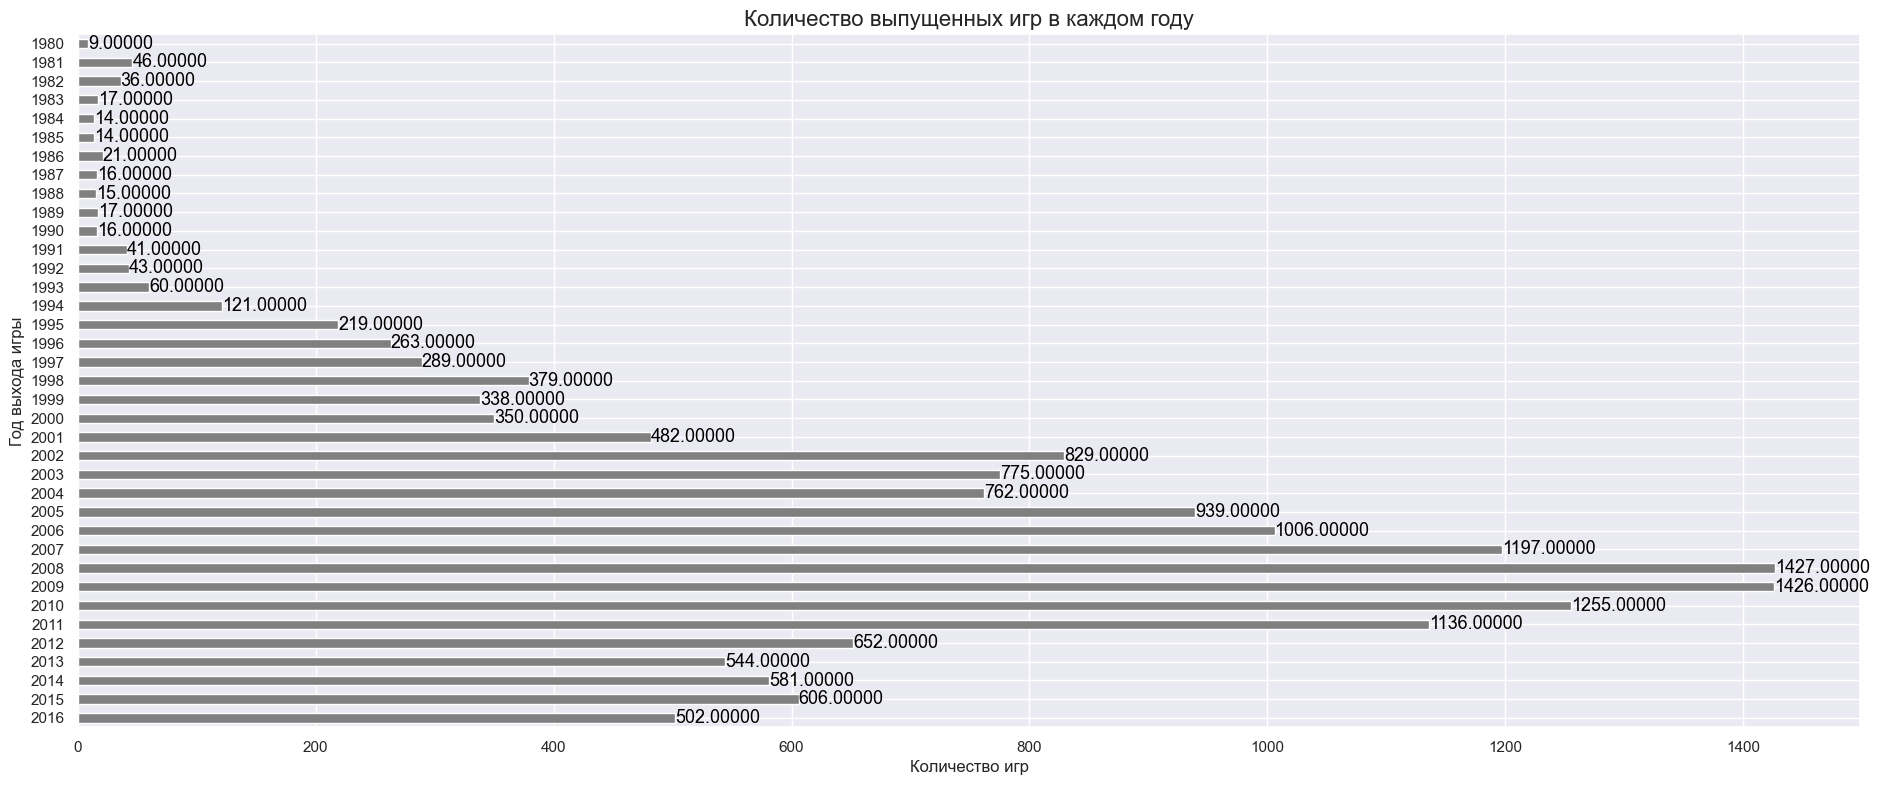

In [155]:
# построим горизонтальную столбчатую диаграмму

horizontal_barplot(games_per_year, 'Количество выпущенных игр в каждом году', 'Количество игр', 'Год выхода игры')

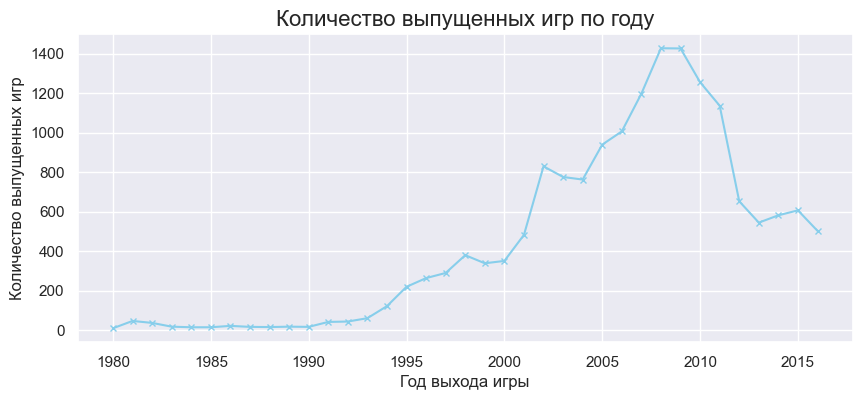

In [42]:
# построим линейный график

linear_plot(games_per_year, 'Год выхода игры', 'Количество выпущенных игр', 'Количество выпущенных игр по году')

С 1980 года по 1990 год игр выпускалось очень мало — сфера лишь начинала развиваться. Далее мы видим два резких скачка вверх — с 1990 года по 2000 год и с 2000 года по 2010 год. Можно сказать, что по мере развития игровой индустрии каждые 10 лет наблюдался резкий прирост в количестве разработанных и выпущенных игр. Однако примерно в 2009 году количество игр пошло на спад. Вряд ли это может быть связано с потерей интереса пользователя к игровой индустрии, скорее, это связано с тем, что на разработку игр теперь тратится гораздо больше времени, а разработчик делает упор не на количество, а на качество своих продуктов и тщательную разработку рекламных кампаний

Предположим, игры стали более дорогими, масштабными и долгими — больше нет огромного их количества. Если такое предположение верно, то резкого и внезапного увеличения количества игр в 2017 году можно не ожидать. Отвечая на вопрос о важности данных за все годы, можно с уверенностью сказать, что игровая индустрия разивается и меняется слишком стремительно, чтобы учитывать данные старше пяти лет

<div style="border: 1px solid rgba(28, 28, 28, 0.2); border-radius: 2px; background-color: rgba(255, 255, 255, 0.8); padding: 10px; font-size: 25px; color: rgba(28, 28, 28, 0.9);">
Исследование сменяемости игровых платформ
</div>

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос: за какой характерный срок появляются новые и исчезают старые платформы?

In [43]:
# сгруппируем данные по названиям платформ и сохраним в переменную 10 платформ с наибольшими суммарными продажами

top_ten_platforms = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
top_ten_platforms = top_ten_platforms.sort_values(by='total_sales', ascending=False).head(10)

In [44]:
# выведем на экран получившийся топ-10

top_ten_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


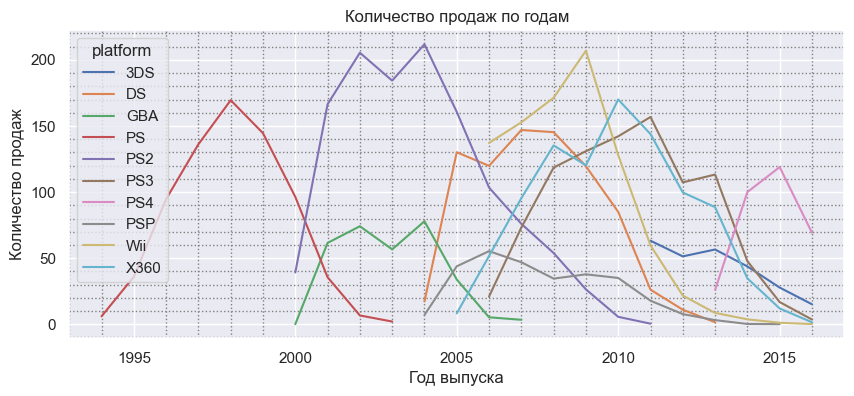

In [45]:
# построим распределение количества проданных копий для каждой платформы по годам

top_sales = games.query('platform in @top_ten_platforms.index')
ax = top_sales.pivot_table(index='release_year', columns='platform', values='total_sales', aggfunc='sum').\
plot(grid=True, figsize=(10, 4), xlim=(1993, 2017))

ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':')
ax.set_title('Количество продаж по годам')
ax.set(xlabel='Год выпуска', ylabel='Количество продаж');

In [46]:
# посчитаем среднюю продолжительность жизни платформ

platforms_age = games.pivot_table(index='platform', values='release_year', aggfunc=['min', 'max']).reset_index()
platforms_age['age'] = platforms_age['max'] - platforms_age['min'] + 1 

In [47]:
# выведем результат на экран

print(f'Средняя продолжительность жизни платформ составляет {round(platforms_age["age"].median())} лет')

Средняя продолжительность жизни платформ составляет 7 лет


Для расчёта средней продолжительности жизни платформы используем медианное значение, потому что так на результат не повлияют данные о PC — вечной платформе. Таким образом, средней продолжительностью жизни платформы можно назвать 7 лет. Видим по графику, что примерно каждые 2-5 лет на рынке появляется новая платформа, причём чем ближе к настоящему времени, тем новые платформы появлялись чаще, пока не достигли отметки 2013 года

<div style="border: 1px solid rgba(28, 28, 28, 0.2); border-radius: 2px; background-color: rgba(255, 255, 255, 0.8); padding: 10px; font-size: 25px; color: rgba(28, 28, 28, 0.9);">
Определение актуального периода
</div>

Исходя из выводов предыдущих двух пунктов, можно определить актуальный для исследования период. Пусть его нижней границей будет 2013 год — таким образом, актуальный период будет охватывать четыре неполных года, включая 2016 год. Такой временной интервал хорошо подойдёт для такой динамично меняющейся индустрии, как компьютерные игры

In [48]:
# отфильтруем данные для дальнейшего исследования

games = games.query('release_year >= 2013')

<div style="border: 1px solid rgba(28, 28, 28, 0.2); border-radius: 2px; background-color: rgba(255, 255, 255, 0.8); padding: 10px; font-size: 25px; color: rgba(28, 28, 28, 0.9);">
Поиск потенциально прибыльных платформ
</div>

Посмотрим, какие платформы лидируют по продажам, растут они или падают, чтобы найти несколько потенциально прибыльных платформ

In [49]:
# сформируем сводную таблицу

potential_income_pivot = games.pivot_table(index='release_year', columns='platform', values='total_sales', aggfunc='sum')

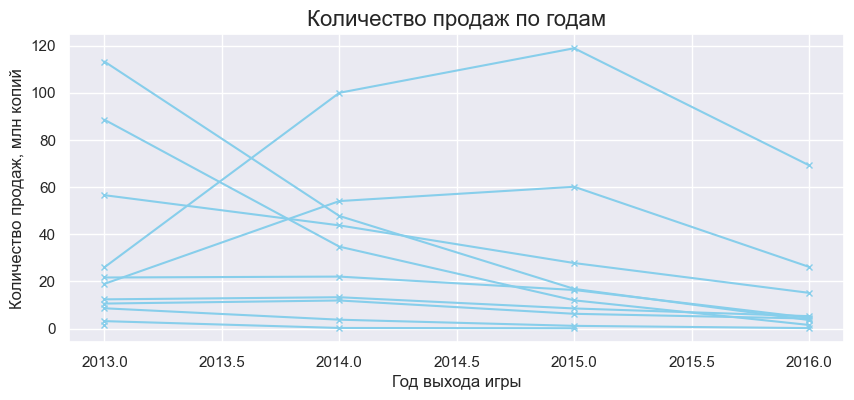

In [50]:
# построим линейный график

linear_plot(potential_income_pivot, 'Год выхода игры', 'Количество продаж, млн копий', 'Количество продаж по годам')

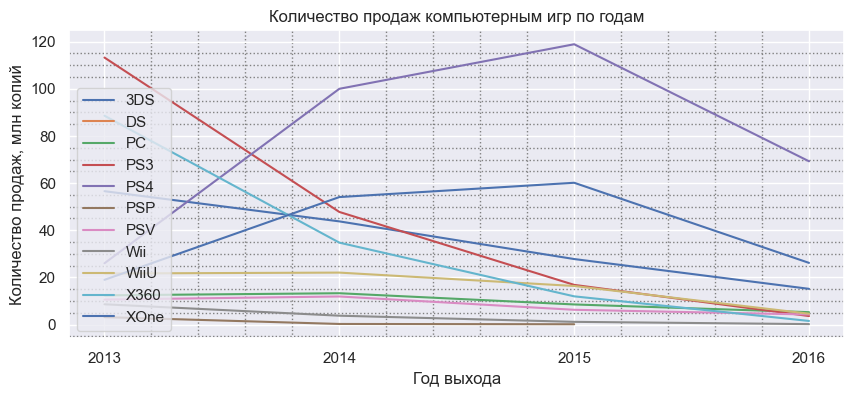

In [51]:
# построим линейную диаграмму, чтобы визуализировать количество продаж по годам

years = range(2013, 2017, 1)
ax = games.pivot_table(index='release_year', columns='platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(10, 4))
ax.minorticks_on()
ax.grid(which='minor', color='gray', linestyle=':')
ax.set_title('Количество продаж компьютерным игр по годам')
ax.set(xlabel='Год выхода', ylabel='Количество продаж, млн копий')
ax.set_xticks(years)
plt.legend(loc=3);

Взглянем на три платформы из нашего топ-10 самых прибыльных платформ — PS3, PS4 и X360. Видим, что с появлением на рынке PS4, продажи на предшествующей ей PS3 начали резко сокращаться. Нет оснований ожидать резкого роста продаж для этой платформы. На 2016 год растущими являются только две платформы — PS4 и X360, причём количество продаж для первой сильно выше — 120 млн проданных копий против 60 млн проданных копий на 2015 год и 69 млн проданных копий против 26 млн проданных копий за 2016 год. Если допустить, что в 2017 году не выйдет ни одной новой платформы, то PS4 и X360 так и останутся на этот год лидирующими по количеству продаж

<div style="border: 1px solid rgba(28, 28, 28, 0.2); border-radius: 2px; background-color: rgba(255, 255, 255, 0.8); padding: 10px; font-size: 25px; color: rgba(28, 28, 28, 0.9);">
Глобальные продажи игр по платформам
</div>

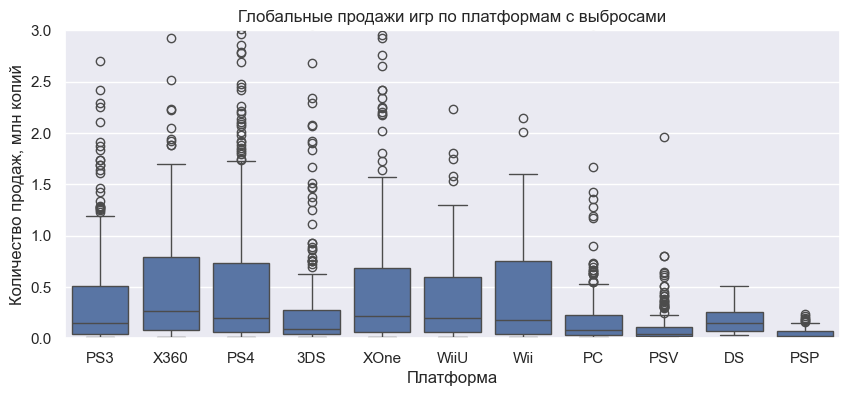

In [52]:
# построим диаграмму размаха по глобальным продажам игр в разбивке по платформам

fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.boxplot(x='platform', y='total_sales', data=games)
plt.ylim(0, 3)
ax.set(title='Глобальные продажи игр по платформам с выбросами', xlabel='Платформа', ylabel='Количество продаж, млн копий')
plt.show()

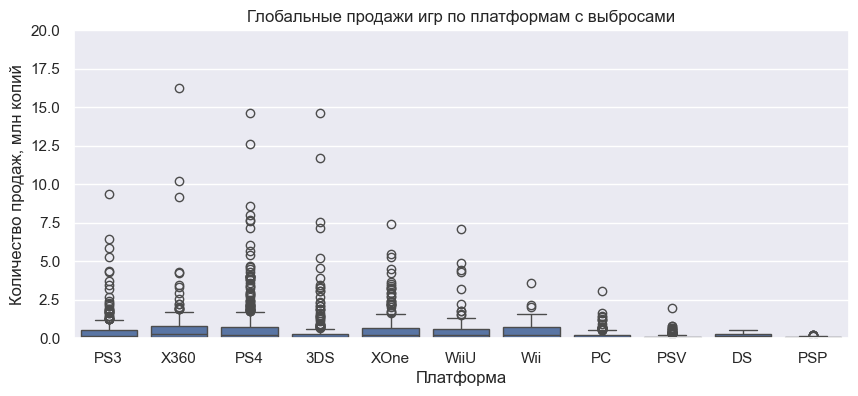

In [53]:
# построим ещё один график, переместив внимание на выбросы

fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.boxplot(x='platform', y='total_sales', data=games)
plt.ylim(0, 20)
ax.set(title='Глобальные продажи игр по платформам с выбросами', xlabel='Платформа', ylabel='Количество продаж, млн копий')
plt.show()

Медианы количества продаж у разных платформ сильно отличаются. Можно выделить две условные группы: DS, 3DS, PC, PSP, PSV и PS2 — платформы, для которых продано до 200 тысяч копий игр, и X360, PS3, PS4, XOne, WiiU — платформы, для которых продажи составили от 200 тысяч копий и выше. Также видим большое количество выбросов в этих данных — это не связано с аномальными значениями, а, скорее, с абсолютными лидерами продаж и бестселлерами игровой индустрии. И это логично — основное количество собранных данных находится в пределах усов ящика, потому что общее количество игр всегда в разы больше, чем бестселлеров. Больше всего выдающихся значений (выбросов или бестселлеров) наблюдается у таких платформ, как PS3, PS4, XOne, X360, Wii, и WiiU

В данном случае расположение боксплотов и медиан показывают, у какой платформы стабильно высокие продажи. Такими платформами являются X360, PS4, XOne и WiiU. Заказчику следует ориентироваться на эти платформы, так как какая игра выстрелит в 2017 году — неизвестно

<div style="border: 1px solid rgba(28, 28, 28, 0.2); border-radius: 2px; background-color: rgba(255, 255, 255, 0.8); padding: 10px; font-size: 25px; color: rgba(28, 28, 28, 0.9);">
Влияние отзывов пользователей и критиков на продажи
</div>

In [54]:
def scatter_plot(data, col_1, col_2, title, xlabel, ylabel):
    
    """
    Функция scatter_plot строит диаграмму рассеяния для двух признаков
    
    Аргументы:
    data (DataFrame) : датафрейм
    col_1 (str) : название столбца с первым признаком
    col_2 (str) : название столбца со вторым признаком
    title (str) : заголовок
    xlabel (str) : подпись оси X
    ylabel (str) : подпись оси Y
    
    """
    
    plt.figure(figsize=(10, 4))
    colors = sns.color_palette('Blues', 1)
    sns.scatterplot(data=data, x=col_1, y=col_2, alpha=0.5, color=colors[0])
    correlation_coefficient = data[col_1].corr(data[col_2], method='spearman')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()

    ax = plt.gca()
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    plt.figtext(0.1, 0.01, 
            f'Коэффициент корреляции Спирмена: {correlation_coefficient:.6f}', ha='center', fontsize=12)

## `PS4`

In [55]:
# отфильтруем данные

ps4_data = games.query('platform == "PS4" & critic_score > 0 & user_score > 0')

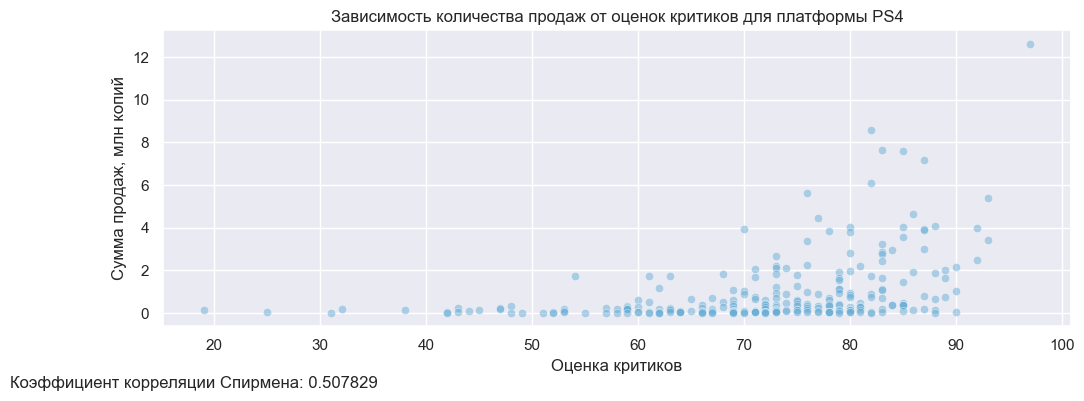

In [56]:
# построим диаграмму рассеяния для признаков total_sales и critic_score

scatter_plot(ps4_data, 'critic_score', 'total_sales', 'Зависимость количества продаж от оценок критиков для платформы PS4', 'Оценка критиков', 'Сумма продаж, млн копий')

Видим, что большие продажи приходится на те игры, которые были высоко оценены критиками, но эта зависимость не имеет постоянный характер. Корреляцию здесь нельзя назвать прочной. Об этом говорит и её коэффициент — 0.50

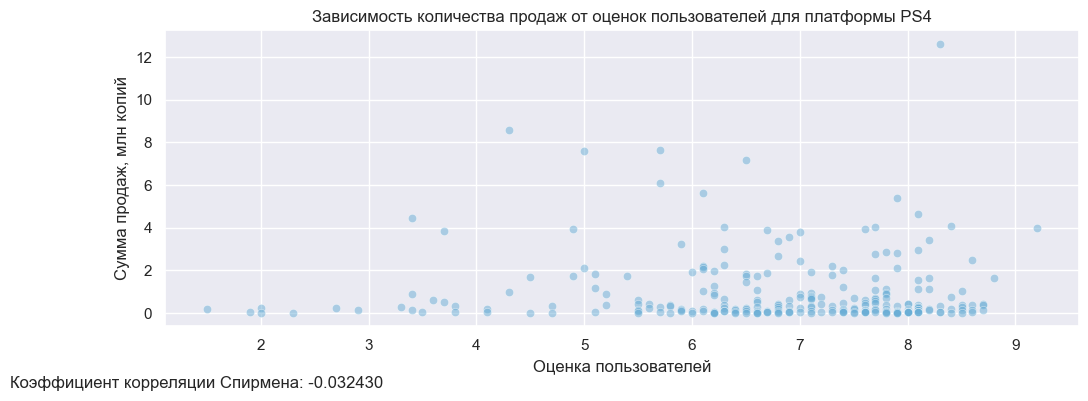

In [57]:
# построим диаграмму рассеяния для признаков total_sales и user_score

scatter_plot(ps4_data, 'user_score', 'total_sales', 'Зависимость количества продаж от оценок пользователей для платформы PS4', 'Оценка пользователей', 'Сумма продаж, млн копий')

Численно видим отсутствие взаимосвязи. Не всегда самые продаваемые игры получают высокие оценки от пользователей, и, наоборот, не всегда популярными являются те игры, которые были высоко оценены

## `X360`

In [58]:
# отфильтруем данные

x360_data = games.query('platform == "X360" & critic_score > 0 & user_score > 0')

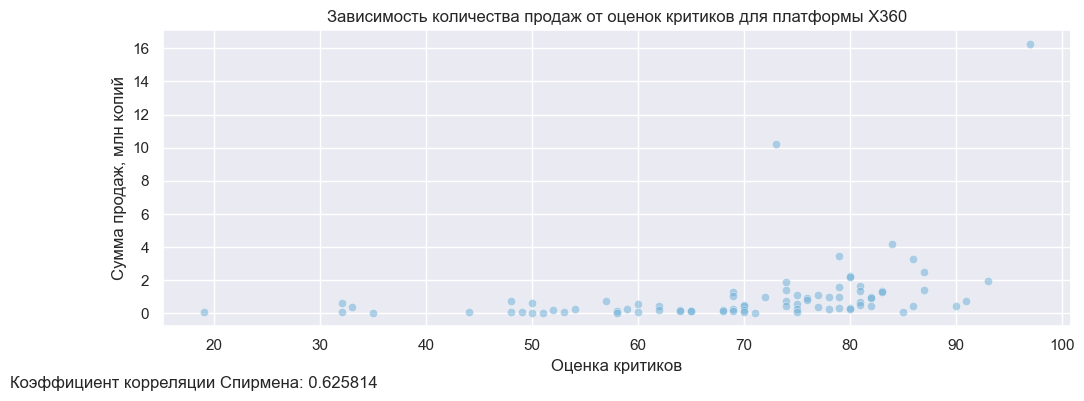

In [59]:
# построим диаграмму рассеяния для признаков total_sales и critic_score

scatter_plot(x360_data, 'critic_score', 'total_sales', 'Зависимость количества продаж от оценок критиков для платформы X360', 'Оценка критиков', 'Сумма продаж, млн копий')

Численно здесь корреляция чуть выше, чем при аналогичных условиях для PS4. Зависимость между количеством продаж и оценками критиков для платформы X360 средняя

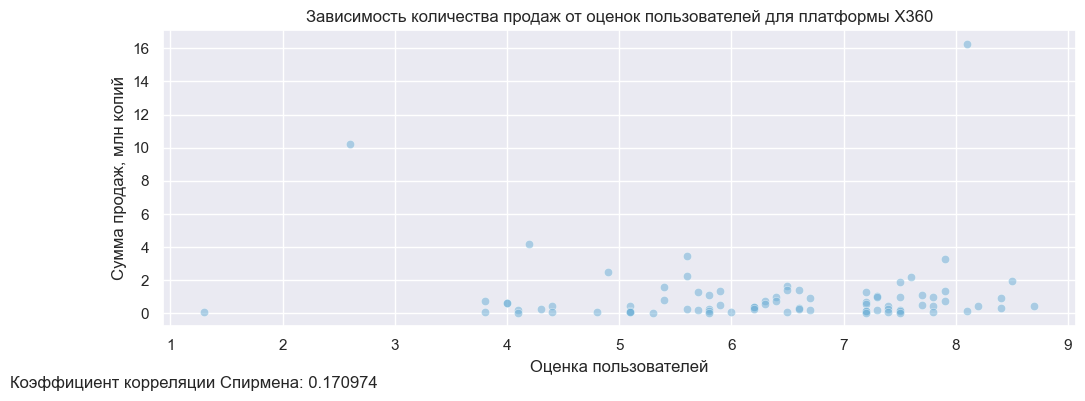

In [60]:
# построим диаграмму рассеяния для признаков total_sales и user_score

scatter_plot(x360_data, 'user_score', 'total_sales', 'Зависимость количества продаж от оценок пользователей для платформы X360', 'Оценка пользователей', 'Сумма продаж, млн копий')

На графике не видна зависимость между количеством продаж и оценками пользователей. Коэффициент корреляции доказывает, что связи между этими двумя признаками нет

## `PS3`

In [61]:
# отфильтруем данные

ps3_data = games.query('platform == "PS3" & critic_score > 0 & user_score > 0')

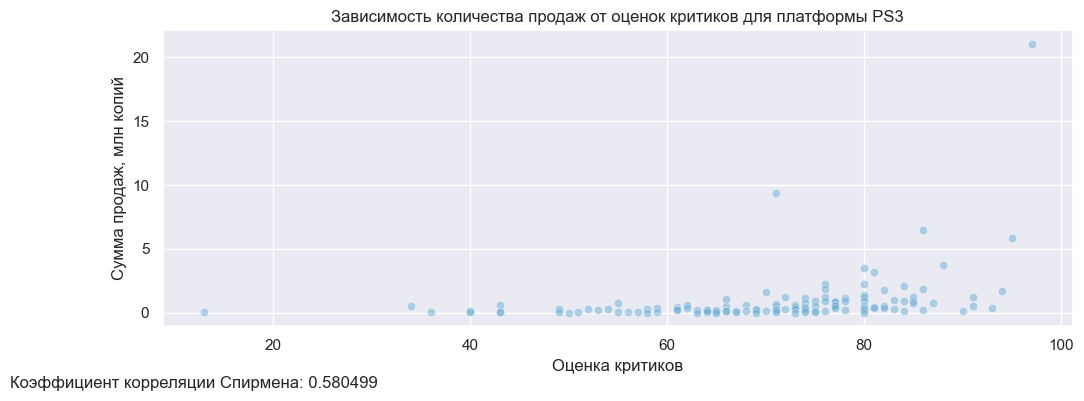

In [62]:
# построим диаграмму рассеяния для признаков total_sales и critic_score

scatter_plot(ps3_data, 'critic_score', 'total_sales', 'Зависимость количества продаж от оценок критиков для платформы PS3', 'Оценка критиков', 'Сумма продаж, млн копий')

Коэффициент корреляции между количеством продаж и оценкой критиков для PS3 составил 0.58. Чем выше оценка, тем больше количество продаж

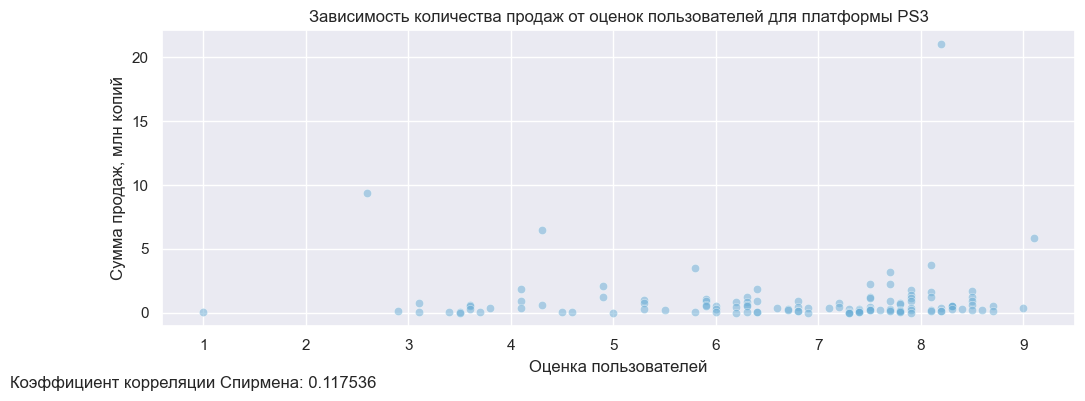

In [63]:
# построим диаграмму рассеяния для признаков total_sales и user_score

scatter_plot(ps3_data, 'user_score', 'total_sales', 'Зависимость количества продаж от оценок пользователей для платформы PS3', 'Оценка пользователей', 'Сумма продаж, млн копий')

Коэффициент корреляции — 0.11. Зависимость между количеством продаж для платформы PS3 и оценкой пользователей очень слабая

## `XOne`

In [64]:
# отфильтруем данные

xone_data = games.query('platform == "XOne" & critic_score > 0 & user_score > 0')

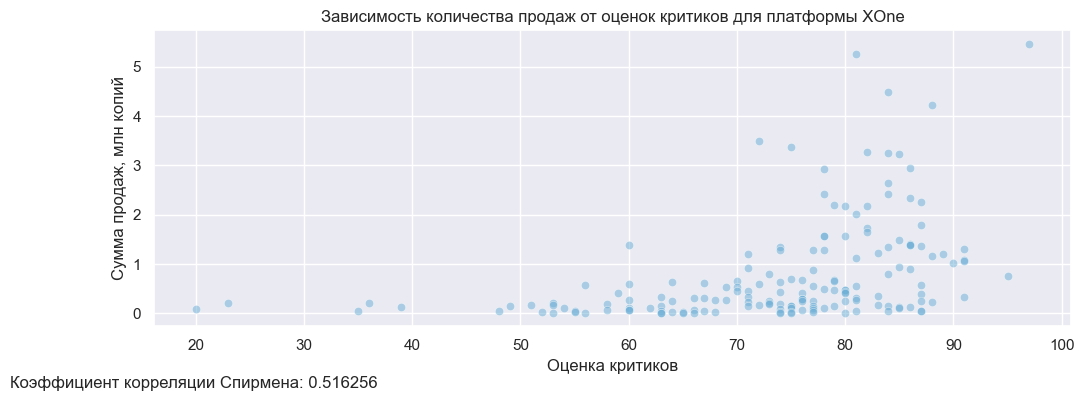

In [65]:
# построим диаграмму рассеяния для признаков total_sales и critic_score

scatter_plot(xone_data, 'critic_score', 'total_sales', 'Зависимость количества продаж от оценок критиков для платформы XOne', 'Оценка критиков', 'Сумма продаж, млн копий')

Коэффициент корреляции оценок критиков и количества продаж практически аналогичен другим платформам. Для XOne он составил 0.51

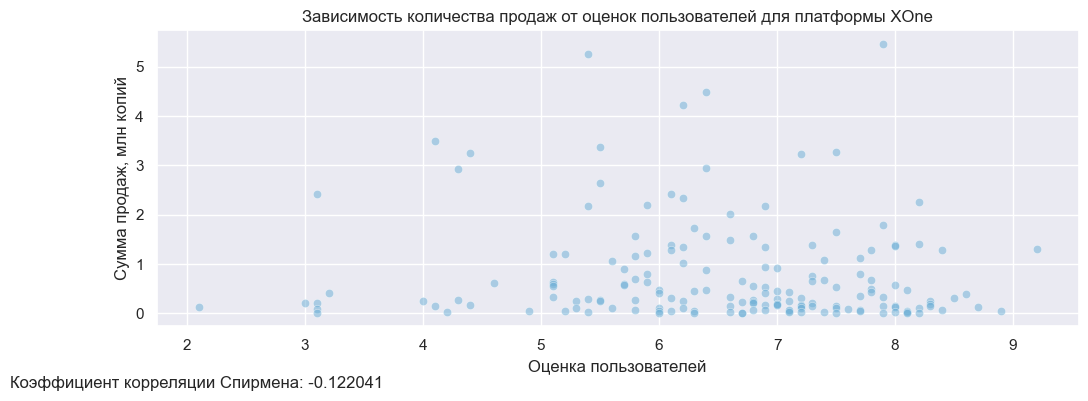

In [66]:
# построим диаграмму рассеяния для признаков total_sales и user_score

scatter_plot(xone_data, 'user_score', 'total_sales', 'Зависимость количества продаж от оценок пользователей для платформы XOne', 'Оценка пользователей', 'Сумма продаж, млн копий')

Коэффициент корреляции составил -0.12. Связь такая же слабая, как и в предыдущих примерах, но в этом случае она ещё и отрицательная

## `WiiU`

In [70]:
# отфильтруем данные

wiiu_data = games.query('platform == "WiiU" & critic_score > 0 & user_score > 0')

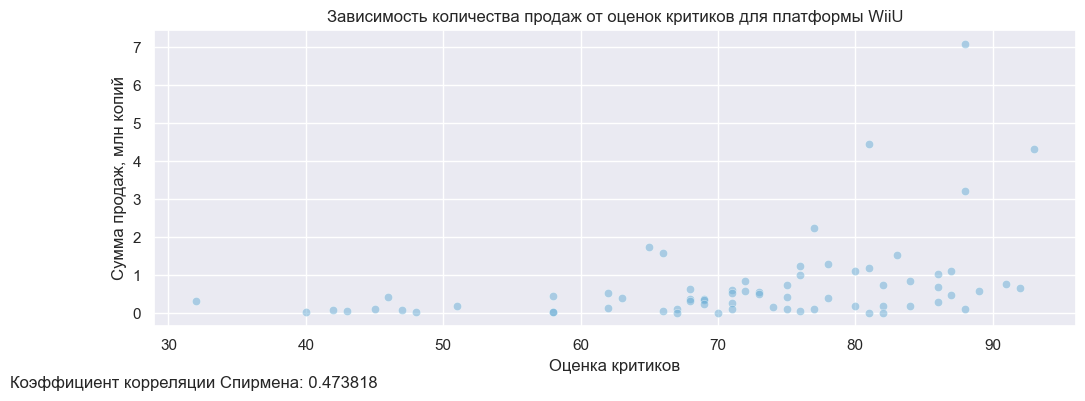

In [73]:
# построим диаграмму рассеяния для признаков total_sales и critic_score

scatter_plot(wiiu_data, 'critic_score', 'total_sales', 'Зависимость количества продаж от оценок критиков для платформы WiiU', 'Оценка критиков', 'Сумма продаж, млн копий')

Видим, что здесь число корреляции схоже с предыдущей платформой

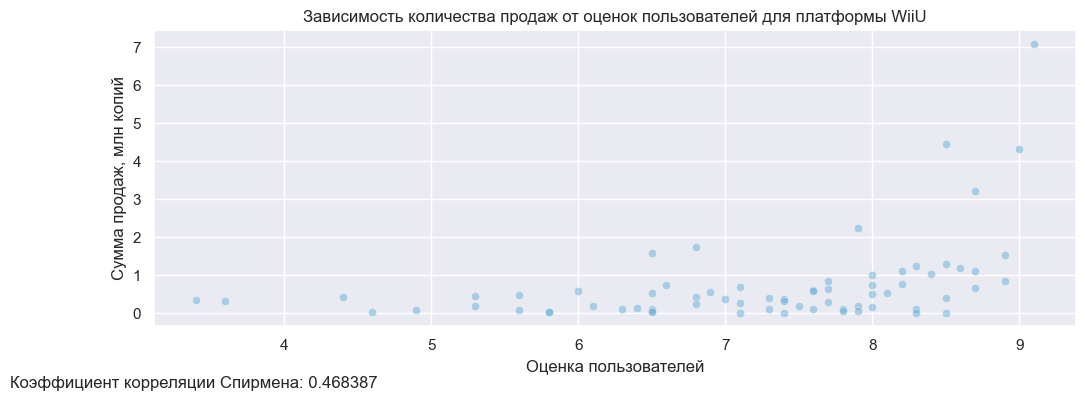

In [72]:
# построим диаграмму рассеяния для признаков total_sales и user_score

scatter_plot(wiiu_data, 'user_score', 'total_sales', 'Зависимость количества продаж от оценок пользователей для платформы WiiU', 'Оценка пользователей', 'Сумма продаж, млн копий')

Для платформы Wii наблюдается высшая зависимость количества продаж от оценок пользователей, нежели чем у всех остальных перечисленных в этом пункте платформ

<div style="border: 1px solid rgba(0, 0, 0, 0.2); border-radius: 10px; background-color: rgba(255, 255, 255, 0.8); padding: 10px;">
Исследовано влияние отзывов пользователей и критиков на количество продаж для разных платформ — PS3, PS4, XOne, X360 и WiiU. Выяснено, что отзывы критиков коррелируют с количеством продаж сильнее, чем отзывы пользователей, но связь всё равно остаётся слабой и несущественной. Для влияния оценок пользователей на количество продаж коэффициент корреляции составляет от 0.47 до 0.62 на перечисленных платформах, для влияния оценок критиков — от -0.1 до 0.46
<div>

<div style="border: 1px solid rgba(28, 28, 28, 0.2); border-radius: 2px; background-color: rgba(255, 255, 255, 0.8); padding: 10px; font-size: 25px; color: rgba(28, 28, 28, 0.9);">
Поиск потенциально прибыльных жанров
</div>

In [82]:
def horizontal_barplot(data, title, xlabel, ylabel):

    """
    Функция horizontal_barplot выводит на экран горизонтальную столбчатую диаграмму

    Аргументы:
    data (DataFrame) : датафрейм, содержащий сводную таблицу
    title (str) : название графика
    xlabel (str) : подпись оси X
    ylabel (str) : подпись оси Y
    
    """
    
    ax = data.plot(kind='barh', figsize=(23, 9), color='grey', grid=True, legend=False)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.invert_yaxis()
    
    for i in ax.patches:
        ax.text(i.get_width(), i.get_y() + i.get_height() / 2, f'{i.get_width():.5f}', 
                fontsize=13, color='black', ha='left', va='center')
    
    plt.show()

---

In [74]:
# взглянем на обшее распределение количества игр по жанрам

games['genre'].value_counts()

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: count, dtype: int64

Видим, что на шестом месте по численности игр стоит жанр Misc, но что это за жанр? [Поиск в Интернете](https://ru.wikipedia.org/wiki/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D1%85_%D0%B8%D0%B3%D1%80) помог узнать, что жанр Misc или Miscellaneous game относится к категории Skill-and-Action игр, но не входит ни в одну из пяти других подкатегорий этого жанра согласно классификации игр по Кроуфорду. Данная классификация актуальна для игр, созданных в 70—80-е годы и не вполне применима к современному игровому разнообразию. Возможно, стоит переработать методику классификации игр в данных

Больше всего на рынке игр жанра Action. Посмотрим, насколько количество игр жанра может означать их прибыльность

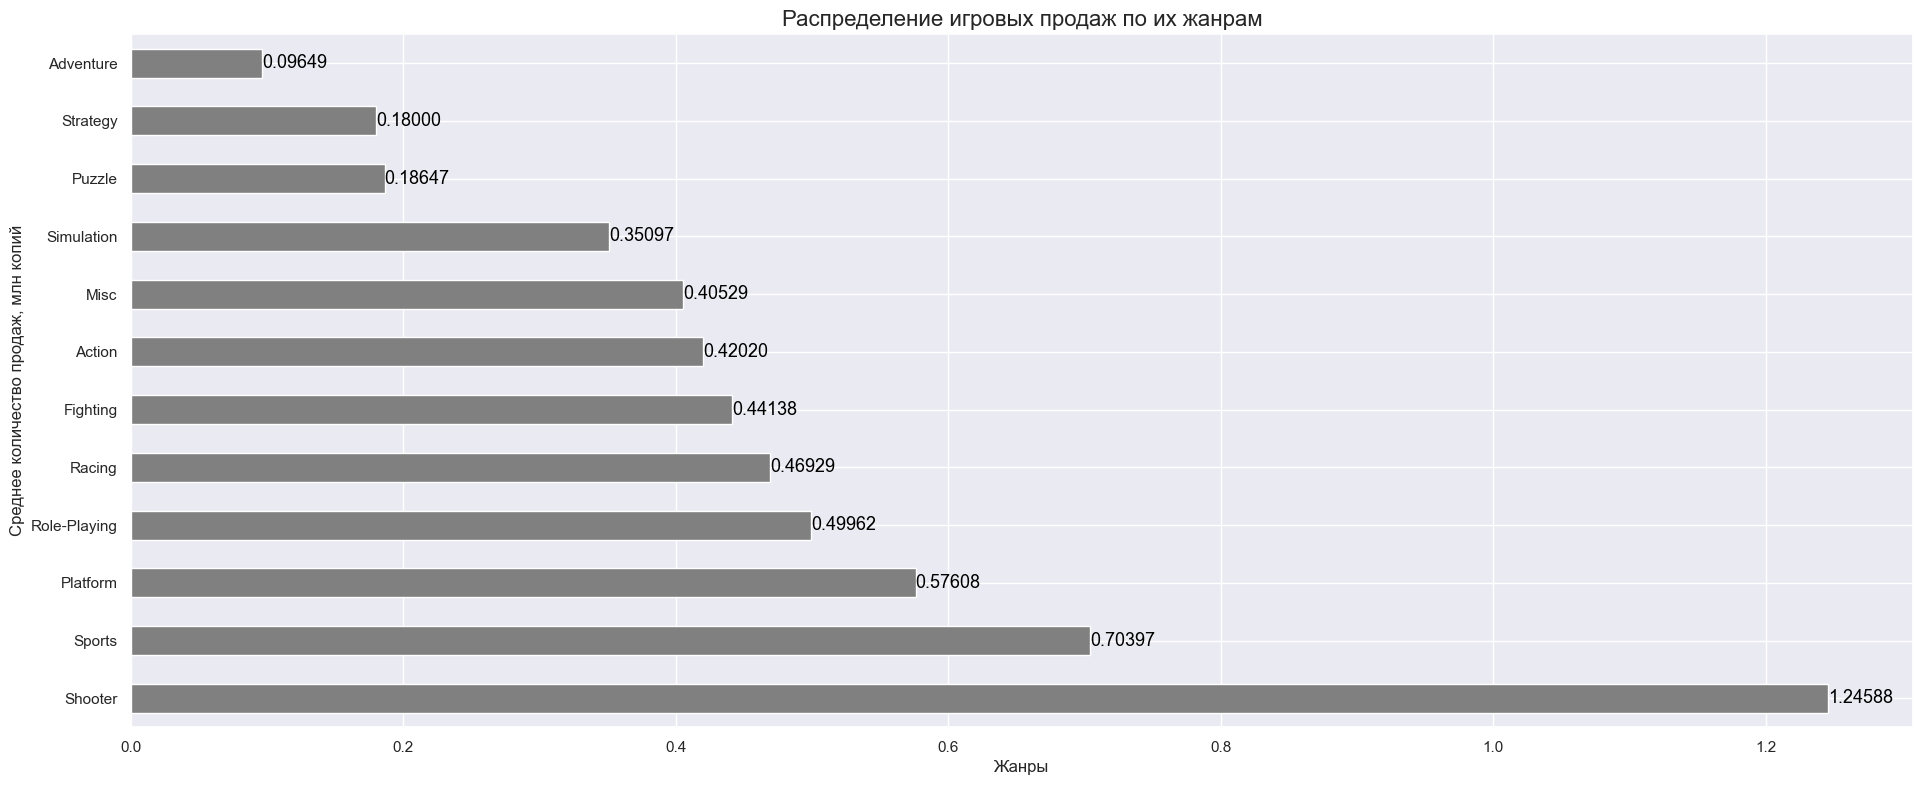

In [83]:
# построим горизонтальную столбчатую диаграмму

genre_total_sales_pivot =  games.pivot_table(index='genre', values='total_sales').sort_values(by='total_sales')
horizontal_barplot(genre_total_sales_pivot, 'Распределение игровых продаж по их жанрам', 'Жанры', 'Среднее количество продаж, млн копий')

Итак, самым продаваемым является жанр Shooter (почти 1,2 млн проданных копий), а наименее успешным — жанр Adventure (продано около 100 тысяч копий). На втором месте по продажам находится жанр Sports (продано более 700 тысяч копий), а третье место делят между собой жанры Platform и Role-Playing, которые были проданы около 500 тысяч раз. Жанр Action, превосходящий другие жанры количественно, не вошёл даже в топ-5 самых прибыльных жанров

<div style="border: 1px solid rgba(28, 28, 28, 0.2); border-radius: 2px; background-color: rgba(255, 255, 255, 0.8); padding: 10px; font-size: 25px; color: rgba(28, 28, 28, 0.9);">
Портрет пользователя каждого региона
</div>

In [151]:
def region_portrait(sales, region_name):
    
    """
    Функция region_portrait строит три сводные таблицы для каждого региона,
    в которых суммирует количество продаж отдельно по платформам, жанру и рейтингу,
    создаёт столбец с долями этих продаж,
    выводит на экран три столбчатые диаграммы
    
    Аргументы:
    sales (str) : название столбца, содержащего суммарные продажи в регионе
    region_name (str) : название региона
    
    """
    
    platform = games.pivot_table(index='platform', values=sales, aggfunc='sum').sort_values(by=sales, ascending=False)[:5]
    platform['sales_share'] = ((platform[sales]/games[sales].sum())*100).round(1)
    print(f'Продажи игр по платформам в {region_name}:')
    display(platform)
    
    print(' ')
    
    genres = games.pivot_table(index='genre', values=sales, aggfunc='sum').sort_values(by=sales, ascending=False)[:5]
    genres['sales_share'] = ((genres[sales]/games[sales].sum())*100).round(1)
    print(f'Продажи игр по жанрам в {region_name}:')
    display(genres)
    
    print(' ')
    
    esrb = games.pivot_table(index='rating', values=sales, aggfunc='sum').sort_values(by=sales, ascending=False)
    esrb['sales_share'] = ((esrb[sales]/games[sales].sum())*100).round(1)
    print(f'Продажи игр по рейтингу ESRB в {region_name}:')
    display(esrb)
    
    sns.set(style='darkgrid')
    plt.figure(figsize=(12.8, 4))
    ax = sns.barplot(x=platform.index, y=sales, data=platform, palette='Blues', hue=sales, dodge=False, legend=False)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height():.1f} млн", 
                fontsize=10, ha='center', va='bottom')  
    plt.title(f'Суммарное количество продаж по платформам в {region_name}', fontsize=16)
    plt.xlabel('Платформа', fontsize=12)
    plt.ylabel('Количество продаж, млн копий', fontsize=12)
    
    plt.figure(figsize=(12.8, 4))
    ax = sns.barplot(x=genres.index, y=sales, data=genres, palette='Blues', hue=sales, dodge=False, legend=False)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height():.1f} млн", 
                fontsize=10, ha='center', va='bottom')  
    plt.title(f'Суммарное количество продаж по жанрам в {region_name}', fontsize=16)
    plt.xlabel('Жанр', fontsize=12)
    plt.ylabel('Количество продаж, млн копий', fontsize=12)
    
    plt.figure(figsize=(12.8, 4))
    ax = sns.barplot(x=esrb.index, y=sales, data=esrb, palette='Blues', hue=sales, dodge=False, legend=False)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height():.1f} млн", 
                fontsize=10, ha='center', va='bottom')  
    plt.title(f'Суммарное количество продаж по рейтингу ESRB в {region_name}', fontsize=16)
    plt.xlabel('Платформа', fontsize=12)
    plt.ylabel('Количество продаж, млн копий', fontsize=12)
    
    plt.show()

---

## `Северная Америка`

Продажи игр по платформам в Северной Америке:


,na_sales,sales_share
platform,,
PS4,108.74,24.8
XOne,93.12,21.3
X360,81.66,18.7
PS3,63.50,14.5
3DS,38.20,8.7


 
Продажи игр по жанрам в Северной Америке:


,na_sales,sales_share
genre,,
Action,126.05,28.8
Shooter,109.74,25.1
Sports,65.27,14.9
Role-Playing,46.40,10.6
Misc,27.49,6.3


 
Продажи игр по рейтингу ESRB в Северной Америке:


,na_sales,sales_share
rating,,
M,165.21,37.7
no_ESRB,89.42,20.4
E,79.05,18.1
E10+,54.24,12.4
T,49.79,11.4


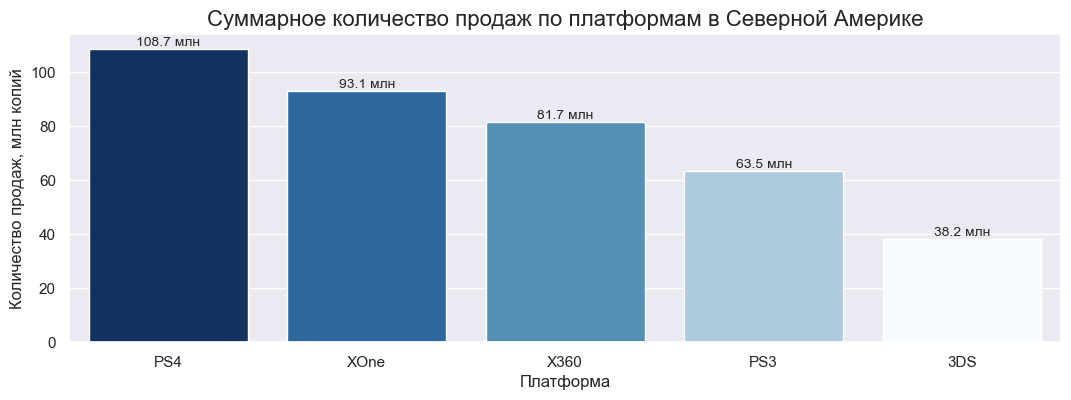

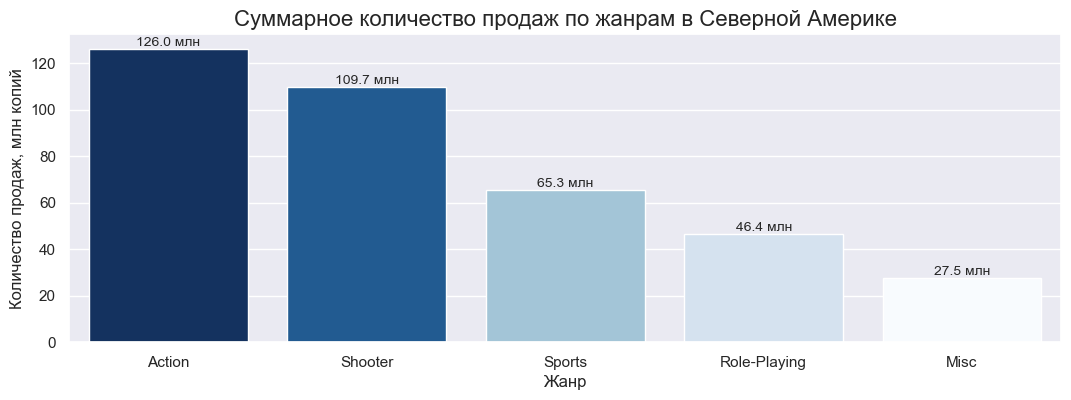

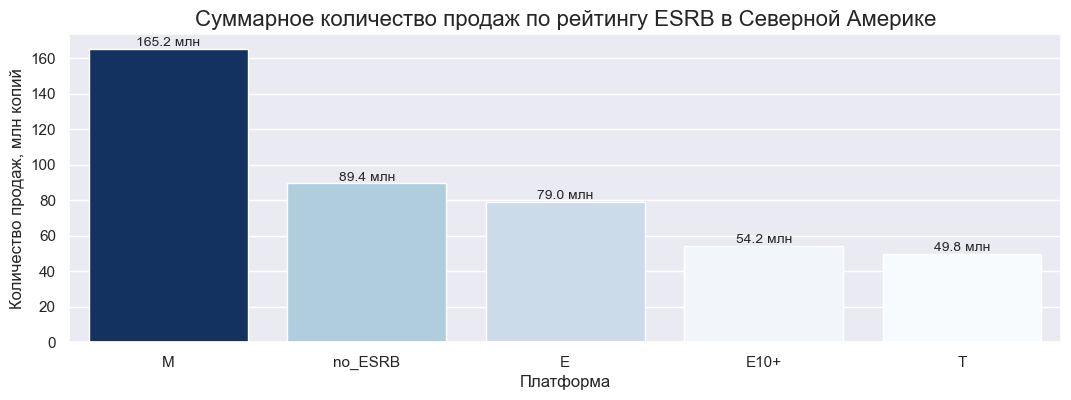

In [150]:
# применим функцию region_portrait

region_portrait('na_sales', 'Северной Америке')

Самой прибыльной платформой в Северной Америке является PS4, занимая 24.8% от общего количества продаж. Второе место занимает XOne с долей от общего количества продаж в 21.3%. Остальные три места в пятёрке платформ занимают X360, PS3 и 3DS. Лучше всего в Америке продаются экшн-игры и шутеры, процент продаж эти жанров составляет 28.8% и 25.1% соответственно. Менее популярными в этой пятёрке являются игры жанров Sports, Misc и Role-Playing. Также в Северной Америке лучше всего продаются игровые продукты с рейтингом M — для взрослых (37.7%)

## `Европа`

Продажи игр по платформам в Европе:


,eu_sales,sales_share
platform,,
PS4,141.09,36.0
PS3,67.81,17.3
XOne,51.59,13.2
X360,42.52,10.8
3DS,30.96,7.9


 
Продажи игр по жанрам в Европе:


,eu_sales,sales_share
genre,,
Action,118.13,30.1
Shooter,87.86,22.4
Sports,60.52,15.4
Role-Playing,36.97,9.4
Racing,20.19,5.1


 
Продажи игр по рейтингу ESRB в Европе:


,eu_sales,sales_share
rating,,
M,145.32,37.0
E,83.36,21.3
no_ESRB,78.91,20.1
E10+,42.69,10.9
T,41.95,10.7


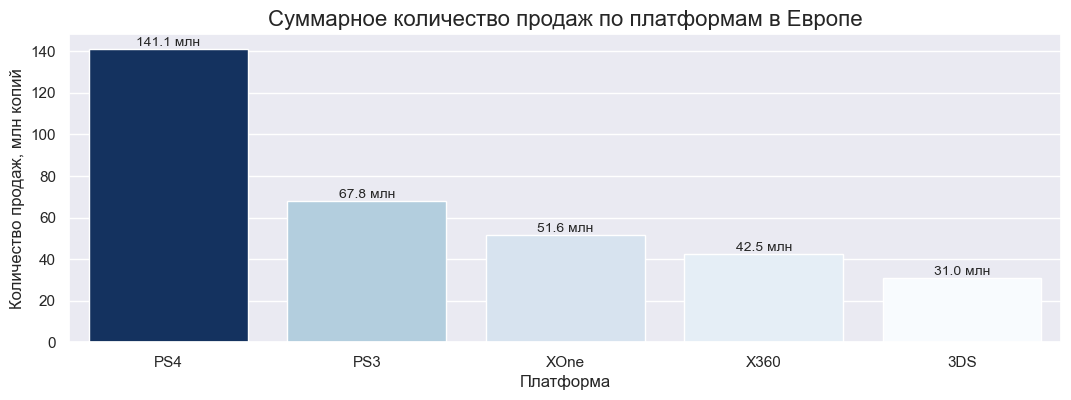

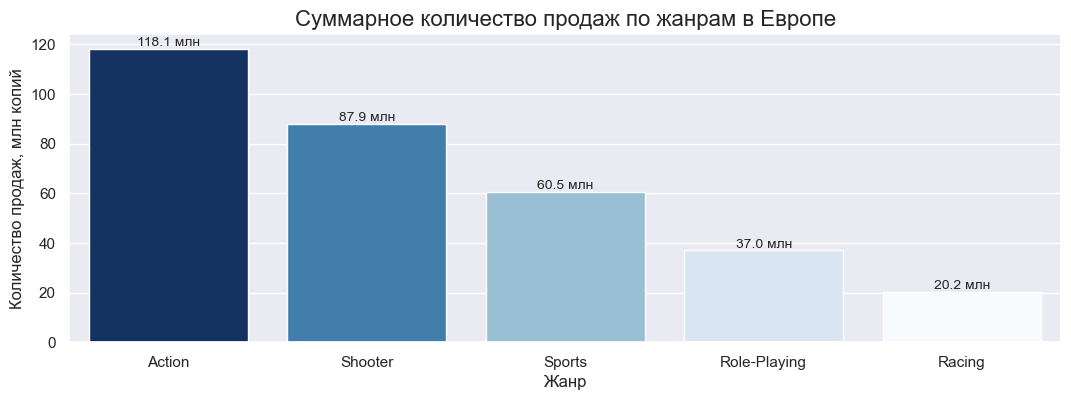

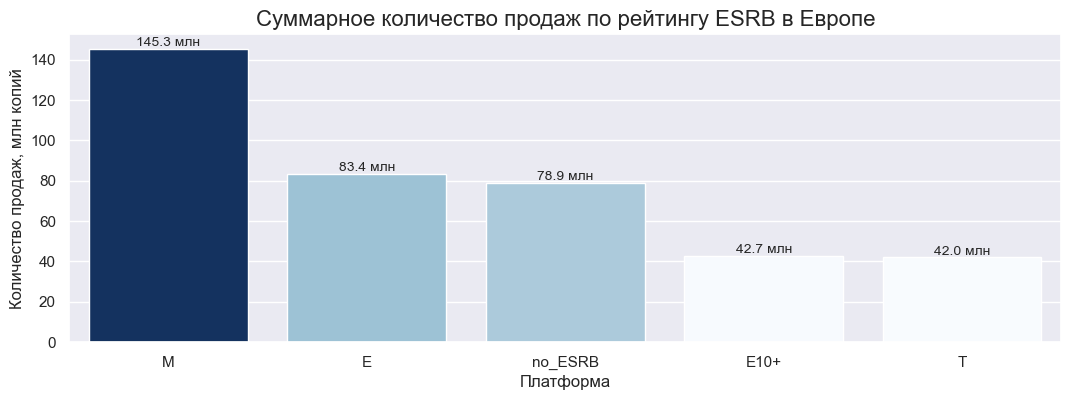

In [153]:
# применим функцию region_portrait

region_portrait('eu_sales', 'Европе')

В топ-5 самых прибыльных платформ в Европе входят PS4 (36%), PS3 (17.3%), XOne (13.2%), X360 (10.8%) и 3DS (7.9%). Топ-5 жанров индентичен с Северной Америкой за исключением того, что в Европе последнее место занимает жанр Racing. Количество продаж по рейтингу ERSB в Европе составляет 37% для рейтинга M и 21.3% для E. Можно сказать, что предпочтения игроков в Северной Америке и Европе очень схожие

## `Япония`

Продажи игр по платформам в Японии:


,jp_sales,sales_share
platform,,
3DS,67.81,48.2
PS3,23.35,16.6
PSV,18.59,13.2
PS4,15.96,11.3
WiiU,10.88,7.7


 
Продажи игр по жанрам в Японии:


,jp_sales,sales_share
genre,,
Role-Playing,51.04,36.3
Action,40.49,28.8
Misc,9.20,6.5
Fighting,7.65,5.4
Shooter,6.61,4.7


 
Продажи игр по рейтингу ESRB в Японии:


,jp_sales,sales_share
rating,,
no_ESRB,85.05,60.4
T,20.59,14.6
E,15.14,10.8
M,14.11,10.0
E10+,5.89,4.2


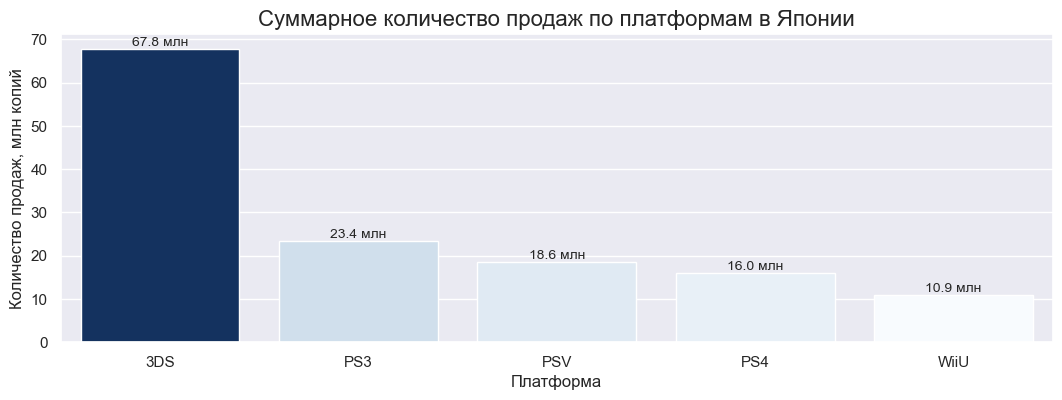

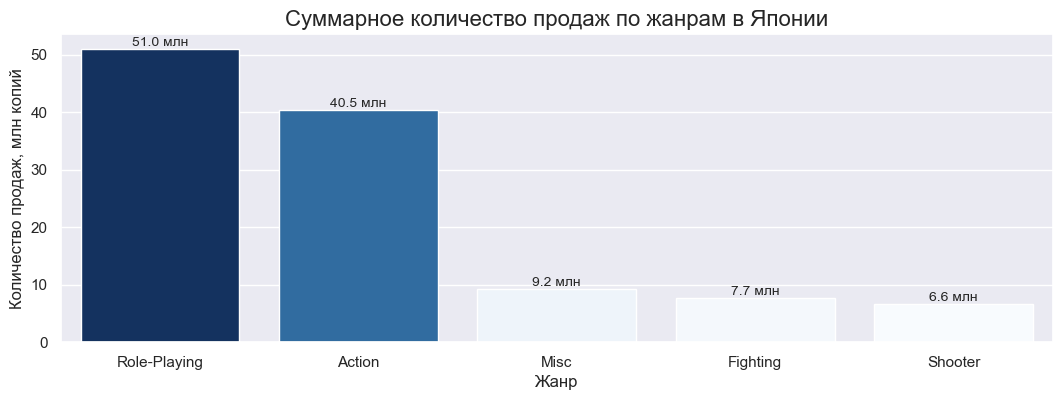

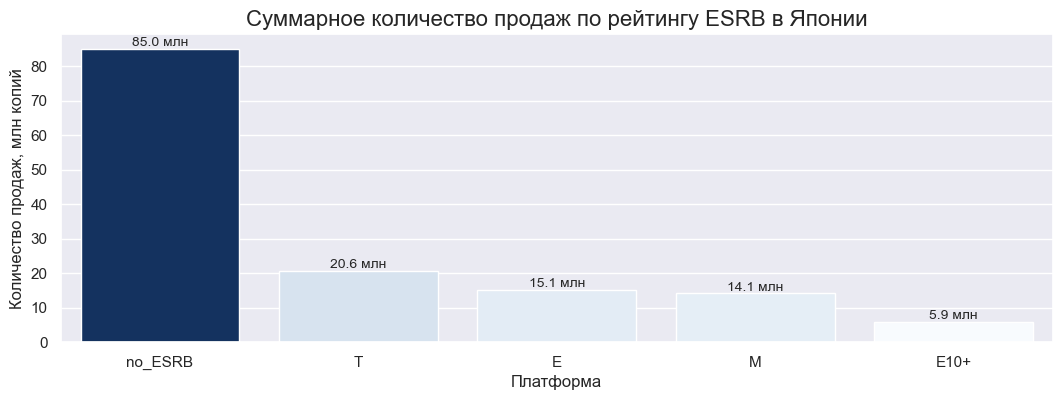

In [154]:
# применим функцию region_portrait

region_portrait('jp_sales', 'Японии')

Видим, что в Японии, в отличие от Европы и Северной Америки, домашние игровые приставки пользуются меньшей популярностью, нежели портативные консоли. Так, лидером продаж среди платформ в Японии стала 3DS, заняв 48.2% рынка. Продажи PS3 находятся на втором месте и составляют 16.6% от общего количества, остальные три места делят между собой такие платформы, как PSV, PS4 и WiiU. Предпочтения в жанрах в Японии также сильно отличаются — лидером является жанр Role-Playing (36.3%), Action здесь находится на втором месте, составив 28.8%. У остальной тройки жанров процент одинаково маленький. Интересно, что в Японии, в отличие от Европы и Северной Америки, спортивные игры не пользуются популярностью. Половину рынка занимают игры с неопределённым рейтингом, игры для взрослых с рейтингом M не так популярны

Рейтинг ESRB предназначен для маркировки игр для США и Канады. Логично, что для других регионов он не заполняется. В Японии есть свой рейтинг, но по нему в датасете нет данных. В данном случае преобладание игр с неопределённым жанром составляет признак, что игра выпущена не в Северо-Американском регионе

<div style="border: 1px solid rgba(0, 0, 0, 0.2); border-radius: 10px; background-color: rgba(255, 255, 255, 0.8); padding: 10px;">
Проведён исследовательский анализ данных. Исследовано количество выпущенных игр по годам и с помощью этого определён актуальный период для данных; найдены потенциально прибыльные платформы и жанры; исследована зависимость продаж от оценок критиков и пользователей; определён срок сменяемости игровых платформ, их «продолжительность жизни». Проведено исследование самых популярных платформ, жанров и рейтинга для каждого из названных регионов; выяснено, что игроки из Японии отличаются от игроков из Северной Америки и Европы; для каждого из регионов в процентах посчитано, какую долю на локальном рынке составляют 5 самых продаваемых платформ, жанров и игр с определённым рейтингом; в общем выводе составлен портрет пользователей по каждому региону
<div>

---

<div style="background-color: rgba(255, 255, 255, 0.8); padding: 20px; font-size: 25px; color: rgba(28, 28, 28, 1);">
Проверка гипотез
</div>

---

<div style="border: 1px solid rgba(28, 28, 28, 0.2); border-radius: 2px; background-color: rgba(255, 255, 255, 0.8); padding: 10px; font-size: 25px; color: rgba(28, 28, 28, 0.9);">
Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
</div>

Сформулируем нулевую и альтернативную гипотезы:


$$ 
H_0:\text{средние пользовательские рейтинги платформ Xbox One и PC одинаковые} 
$$

$$ 
H_1:\text{средние пользовательские рейтинги платформ Xbox One и PC различаются} 
$$

Чтобы проверить нулевую гипотезу о разности среднего пользовательского рейтинга у двух платформ, равной нулю, используем метод `scipy.stats.ttest_ind()`. Он используется для проверки гипотезы о равенстве среднего из двух генеральных совокупностей по взятым из них выборкам. В нашем случае выборками будут служить данные, отфильтрованные по двум платформам. Проведём двусторонний тест. В качестве аргумента методу укажем параметр `alternative='two-sided'`, уровнем статистической значимости установим значение в 0.05. Выводы, которые предстоит сделать в результате этого исследования, не связаны с большой ответственностью (например, с ответственностью за человеческую жизнь в исследованиях на медицинскую тематику), поэтому уровня значимости в 0.05 будет вполне достаточно. Такой же уровень статистической значимости будет использован и при проверке следующей гипотезы

In [156]:
# сформируем выборки и отфильтруем заглушки

xbox_games = games.query('platform == "XOne" & user_score > 0')
pc_games = games.query('platform == "PC" & user_score > 0')

In [157]:
# выведем на экран средние пользовательские рейтинги для двух платформ

print(f'Средний пользовательский рейтинг Xbox One: {xbox_games["user_score"].mean().round(1)}')
print(f'Средний пользовательский рейтинг PC: {pc_games["user_score"].mean().round(1)}')

Средний пользовательский рейтинг Xbox One: 6.5
Средний пользовательский рейтинг PC: 6.3


In [158]:
# установим уровень статистической значимости

alpha = 0.05

In [161]:
# проведём статистический тест

result1 = st.ttest_ind(xbox_games['user_score'], pc_games['user_score'], alternative='two-sided')

In [162]:
# получим p-value

print('P-value:', result1.pvalue)

P-value: 0.14012658403611647


In [164]:
# проверим p-value

if result1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной')
else:
    print('Не отвергаем нулевую гипотезу') 

Не отвергаем нулевую гипотезу


Нулевая гипотеза не была отвергнута в пользу альтернативной. Средние значения пользовательского рейтинга для каждой из двух платформ являются одинаковыми

<div style="border: 1px solid rgba(28, 28, 28, 0.2); border-radius: 2px; background-color: rgba(255, 255, 255, 0.8); padding: 10px; font-size: 25px; color: rgba(28, 28, 28, 0.9);">
Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные
</div>

Сформулируем нулевую и альтернативную гипотезы:

$$ 
H_0:\text{средние пользовательские рейтинги жанров Action и Sports одинаковые} 
$$

$$ 
H_1:\text{средние пользовательские рейтинги жанров Action и Sports различаются} 
$$

Эта задача аналогична предыдущей. Для проверки этой гипотезы также потребуется метод `scipy.stats.ttest_ind()` с аргументом `alternative='two-sided'`. Выборками послужат две новые таблицы, отфильтрованные из первоначальной таблицы по необходимым жанрам

In [165]:
# сформируем выборки и отфильтруем заглушки

action_games = games.query('genre == "Action" & user_score > 0')
sports_games = games.query('genre == "Sports" & user_score > 0')

In [166]:
# выведем на экран средние пользовательские рейтинги для двух жанров

print(f'Средний пользовательский рейтинг в жанре Action: {action_games["user_score"].mean().round(1)}')
print(f'Средний пользовательский рейтинг в жанре Sports: {sports_games["user_score"].mean().round(1)}')

Средний пользовательский рейтинг в жанре Action: 6.8
Средний пользовательский рейтинг в жанре Sports: 5.2


In [167]:
# установим уровень статистической значимости

alpha = 0.05

In [168]:
# проведём статистический тест

result2 = st.ttest_ind(action_games['user_score'], sports_games['user_score'], alternative='two-sided')

In [169]:
# получим p-value

print('P-value:', result2.pvalue)

P-value: 1.0517832389140023e-27


In [171]:
# проверим p-value

if result2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной')
else:
    print('Не отвергаем нулевую гипотезу') 

Отвергаем нулевую гипотезу в пользу альтернативной


Отвергаем нулевую гипотезу в пользу альтернативной — средние пользовательские рейтинги жанров Action и Sports различаются, это подтверждают и средние значения, посчитанные методом mean()

---

<div style="background-color: rgba(255, 255, 255, 0.8); padding: 20px; font-size: 25px; color: rgba(28, 28, 28, 1);">
Общий вывод
</div>

---

<div style="border: 1px solid rgba(0, 0, 0, 0.2); border-radius: 10px; background-color: rgba(255, 255, 255, 0.8); padding: 10px;">

С 1980 года количество выпущенных игр плавно росло по мере развития игровой индустрии, однако делая небольшие резкие скачки каждые 10 лет. Пик количества вышедших игр — 1400 штук — приходится на 2008 и 2009 годы, затем это количество резко падает и к настоящему моменту продолжает свой отрицательный рост. Последние 3 года количество выпускаемых игр держится на отметке между 400 и 600 штук. Это не связано с потерей интереса пользователя к индустрии или с каким-либо кризисом индустрии; предполагается, что с развитием игровых технологий разработка стала занимать гораздо больше времени, требования пользователей к продукту возрослия, масштабные игры, возможно, пользуются большим спросом — разработчик делает упор на качество, а не на количество. Таким образом, в 2017 году роста численности вышедших игровых продуктов не ожидается

Средняя продолжительность жизни одной платформы составила 7 лет, но при этом есть одна платформа, которая стабильно востребована с момента возникновения и продолжает таковой оставаться. Видим по графику, что примерно каждые 2-5 лет на рынке появляется новая платформа, причём чем ближе к настоящему времени, тем новые платформы появлялись чаще, пока не достигли отметки 2013 года

За левую границу актуального периода был взят 2013 год — так как игровая индустрия является очень динамично развивающейся сферой, период в 4 неполных года будет самым оптимальным для исследования. Данные до 2013 года в этом случае будут считаться устаревшими

До 2013 года самыми прибыльными являлись такие платформы, как X360 и PS3. Пик их прибыльности пришёлся на 2010 год, количество проданных копий находится между 140 и 170 миллионами копий, затем их прибыльность постепенно снижалась (но оставалась очень высокой относительно других платформ), пока на рынок не вышли две новые платформы. После 2013 года ситуация изменилась в их пользу — PS4 и XOne заняли основное место на рынке и на данный момент являются самыми прибыльными. Пик их прибыльности фиксирует 120 млн проданных копий для PS4 и 60 млн проданных копий для XOne в предыдущем (2015 году). Возможно, игры стали более дорогими, поэтому таких высоких отметок в продажах, как было в 2010 году, мы больше не видим. Примечательно, что среди всех платформ неизменной остаётся популярность PC; она приносит от 10 до 35 тысяч проданных копий в год и на фоне остальных является самой стабильной платформой, не пропадая с рынка с момента своего появления

С помощью диаграмм размаха удалось выделить две условные группы платформ: DS, 3DS, PC, PSP, PSV и PS2 — это те платформы, для которых продано до 200 тысяч копий игр; и X360, PS3, PS4, XOne, WiiU — те платформы, продажи для которых составили от 200 тысяч копий и выше. На получившемся графике можно увидеть большое количество выбросов — это игры, которые стали бестселлерами

Влияние отзывов пользователей и критиков на продажи для разных платформ, а именно — PS3, PS4, X360, XOne и Wii — похоже друг на друга и слабо меняется от платформы к платформе. В целом эта зависимость является довольно слабой, несущественной или отсутствует вовсе. Нельзя сказать о каких-то прочных связях или закономерностях

В топ-5 жанров по количеству игр в каждом вошли такие жанры, как Action, Sports, Misc, Role-Playing и Adventure, иимеющие количественно 1400 (для жанра Action) либо 400-600 игр (для остальных перечисленных жанров) соответственно. Самыми прибыльными же являются жанры, входящие в следующий топ-5: Shooter, Platform, Sports, Role-Playing и Racing. Продажи шутеров составили 1,2 млн копий, продажи платформенного жанра — примерно 850 тысяч копий, остальные три жанра находятся примерно на одном уровне между 400 и 600 тысячами проданных копий. Таким образом, из этого топ-5 можно выделить два потенциально прибыльных жанра — Shooter и Platform

<div>

<div style="border: 1px solid rgba(0, 0, 0, 0.2); border-radius: 10px; background-color: rgba(255, 255, 255, 0.8); padding: 10px;">

Составлен примерный портрет игрока в каждом из трёх представленных регионов:

`Пользователи из Северной Америки`:
- предпочитают домашние игровые приставки портативным консолям
- чаще всего играют на таких платформах, как X360, PS3, PS4 и Wii
- вероятнее всего уже достигли совершеннолетия, хотя среди них есть подростки и дети старше 10 лет
- предпочитают играть в экшн-игры, шутеры и игры со спортивной тематикой
    
`Пользователи из Европы`:
- похожи на пользователей из Северной Америки в выборе игровых платформ и игровых жанров
- так же, как и пользователи из Северной Америки, предпочитают игры для взрослых или для всех возрастных категорий, но немалую часть рынка занимают и подростки с детьми старше 10 лет

`Пользователи из Японии`:
- предпочитают портативные консоли домашним приставкам
- в топ-5 популярных в Японии платформ входит лишь одна домашняя приставка, и это PS3, в остальном же это такие портативные консоли, как 3DS, PSP, DS и PSV
- предпочитают играть в ролевые игры, а также в игры жанра экшн и смешанного жанра
- половину рынка занимают продажи игр в рейтинге RP, а игры для всех возрастных категорий и игры для подростков опережают по количеству продаж игры для взрослых

<div>

<div style="border: 1px solid rgba(0, 0, 0, 0.2); border-radius: 10px; background-color: rgba(255, 255, 255, 0.8); padding: 10px;">

По условию задачи необходимо было проверить две гипотезы: 
$$ 
1:\text{средние пользовательские рейтинги платформ Xbox One и PC одинаковые} 
$$

$$ 
2:\text{средние пользовательские рейтинги жанров Action и Sports различаются} 
$$

Исследование, проведённое на имеющихся данных, на уровне значимости 5% дало основания подтвердить гипотезу о равенстве средних значений пользовательских рейтингов для платформ Xbox One и PC и гипотезу о том, что средние значения пользовательских рейтингов для жанров Action и Sports различаются

<div>

<div style="border: 1px solid rgba(0, 0, 0, 0.2); border-radius: 10px; background-color: rgba(255, 255, 255, 0.8); padding: 10px;">

В процессе исследования были выявлены следующие определяющие успешность игры закономерности: в Северной Америке и Европе игра с большей вероятностью будет хорошо продаваться, если она выпущена для домашних игровых приставок и её жанром является Action, Shooter, Sports или Role-Playing. Также бóльшую прибыль для этих двух регионов принесут игры для всех возрастных категорий, для подростков или для детей старше 10 лет. В Японии же чаще всего становятся успешными игры в таких жанрах, как Role-Playing, Action, Misc (смешанный жанр), Adventure или Sports, выпущенные на портативных консолях. Можно отметить, что жанр Action пользуется популярностью в каждом из трёх названных регионов

В 2017 году количество выпущенных игр, скорее всего, продолжит падать или оставаться на той же отметке, что и сейчас, но вряд ли будет расти. Самыми перспективными для 2017 года являются платформы PS4 и XOne
    
<div>